# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [1]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

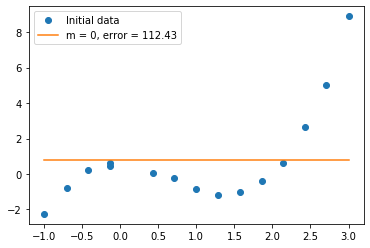

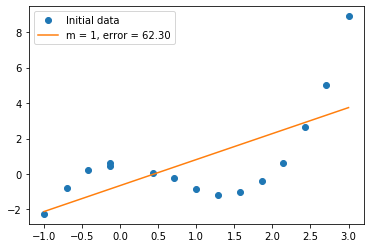

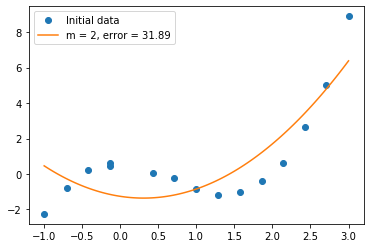

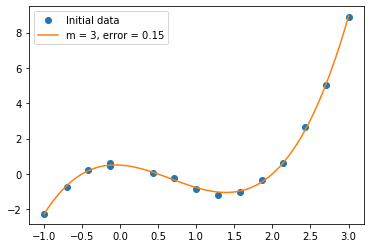

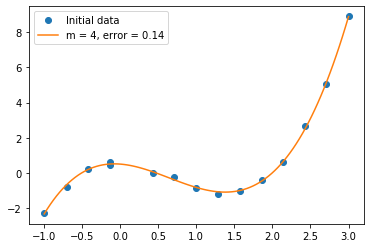

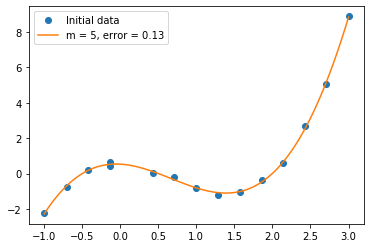

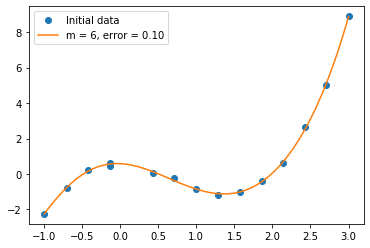

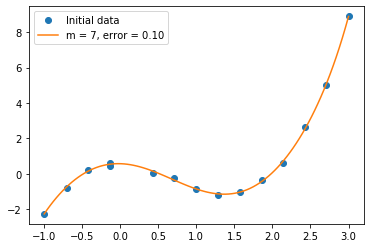

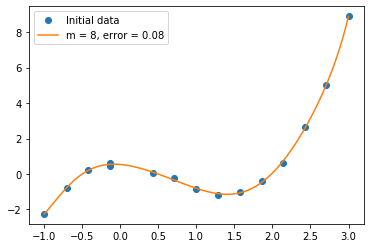

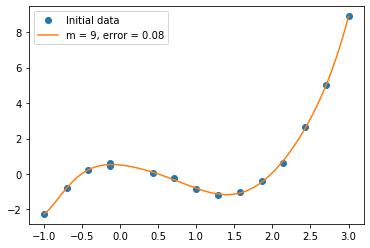

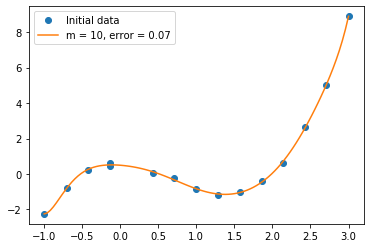

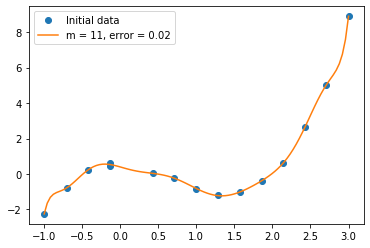

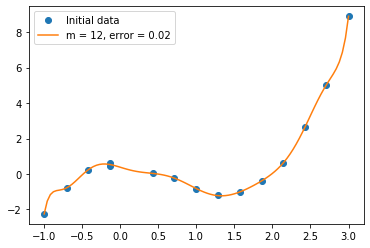

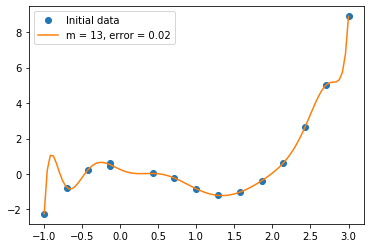

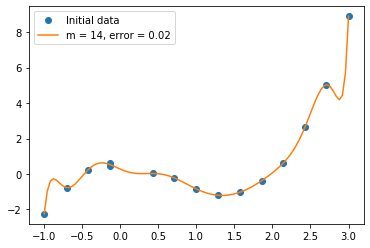

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def lsa(y, x, m):
    x0 = np.asarray(x)
    y0 = np.asarray(y)
    if type(m) != int or m >= x0.shape[0]:
        return False
    
    X = []
    for i in range(m + 1):
        X.append(x0**i)
    X = np.array(X).T
    
    return np.linalg.solve(X.T @ X, X.T @ y)
   
x = np.asarray(x)
y = np.asarray(y)
c = 1
lin = np.linspace(np.min(x), np.max(x), 100)
coeff = lsa(y, x, 0)
sigma_temp = []

while type(coeff) != bool:
    P = lambda z: coeff @ np.array([z**i for i in range(c)])
    error = np.sum((P(x) - y)**2)
    sigma_temp.append(error)
    plt.plot(x, y, 'o', label='Initial data')
    plt.plot(lin, P(lin), '-', label='m = %i, error = %.2f' % (c - 1, error))
    plt.legend()
    plt.show()
    coeff = lsa(y, x, c)
    c += 1

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

[7.49537956e+00 4.45021587e+00 2.45342700e+00 1.24708991e-02
 1.24604076e-02 1.26000593e-02 1.15908137e-02 1.22890418e-02
 1.15693715e-02 1.29310452e-02 1.42579196e-02 5.37940770e-03
 7.12905294e-03 1.00564846e-02 2.00000940e-02]


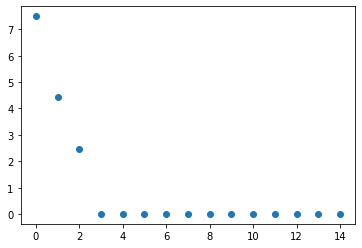

In [3]:
sigma = np.array([sigma_temp[i] / (x.shape[0] - i) for i in range(len(sigma_temp))])
print(sigma)
plt.plot(range(sigma.shape[0]), sigma, 'o')
plt.show()

m_opt = 3

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

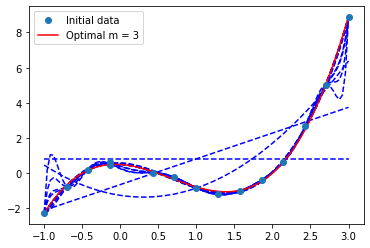

In [4]:
x = np.asarray(x)
y = np.asarray(y)
c = 1
lin = np.linspace(np.min(x), np.max(x), 100)
coeff = lsa(y, x, 0)
plt.plot(x, y, 'o', label='Initial data')

while type(coeff) != bool:
    P = lambda z: coeff @ np.array([z**i for i in range(c)])
    if c - 1 == m_opt:
        line = '-'
        label = 'Optimal m = %i' % m_opt
        color = 'red'
        zorder = 1
    else:
        line = '--'
        label = ''
        color = 'blue'
        zorder = 0
    plt.plot(lin, P(lin), line, label=label, color=color, zorder=zorder)
    coeff = lsa(y, x, c)
    c += 1
    
plt.legend()
plt.show()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

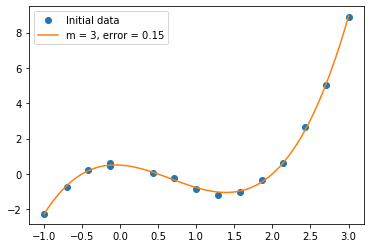

In [5]:
from numpy.linalg import qr

def lsa_with_qr(y, x, m):
    x0 = np.asarray(x)
    y0 = np.asarray(y)
    if type(m) != int or m >= x0.shape[0]:
        return False
    
    X = []
    for i in range(m + 1):
        X.append(x0**i)
    X = np.array(X).T
    Q, R = qr(X)
    
    k = np.min(x0.shape)
    return np.linalg.solve(R[:k], Q.T @ y[:k])

lin = np.linspace(np.min(x), np.max(x), 100)
coeff = lsa_with_qr(y, x, m_opt)

P = lambda z: coeff @ np.array([z**i for i in range(m_opt + 1)])
error = np.sum((P(x) - y)**2)
plt.plot(x, y, 'o', label='Initial data')
plt.plot(lin, P(lin), '-', label='m = %i, error = %.2f' % (m_opt, error))
plt.legend()
plt.show()

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

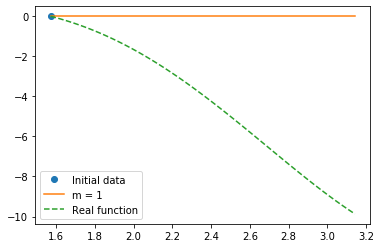

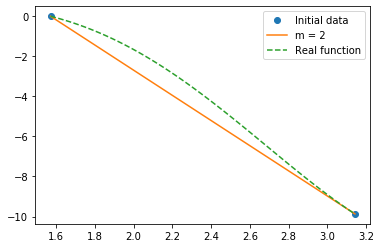

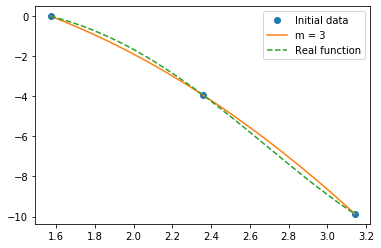

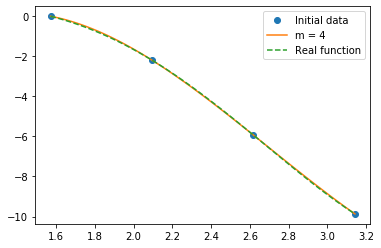

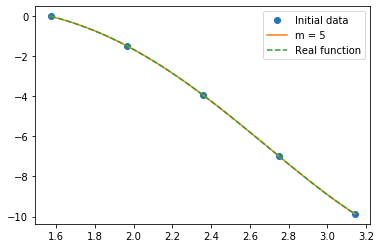

In [9]:
def lagranz(x, y, p):
    x0 = np.asarray(x)
    y0 = np.asarray(y)
    
    res = 0
    for j in range(y0.shape[0]):
        p1 = 1
        p2 = 1
        for i in range(x0.shape[0]):
            if i != j:
                p1 = p1 * (p - x0[i])
                p2 = p2 * (x0[j] - x[i])
        res += y0[j] * p1 / p2
        
    return res
 
f = lambda z: z**2 * np.cos(z)
xlin = np.linspace(np.pi/2, np.pi, 100)

for m in range(1, 6):
    x = np.linspace(np.pi/2, np.pi, m)
    y = f(x)
    plt.plot(x, y, 'o', label='Initial data')
    plt.plot(xlin, [lagranz(x, y, i) for i in xlin], '-', label='m = %i' % m)
    plt.plot(xlin, f(xlin), '--', label='Real function')
    plt.legend()
    plt.show()


### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

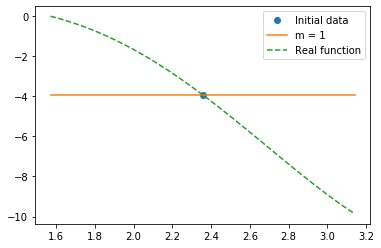

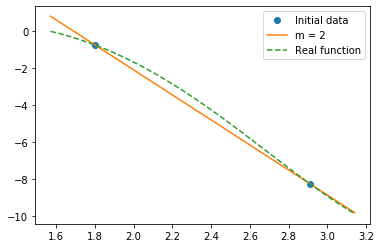

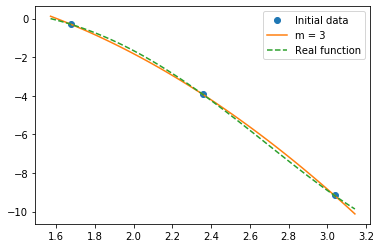

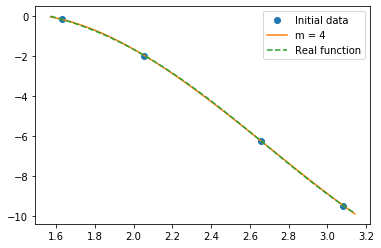

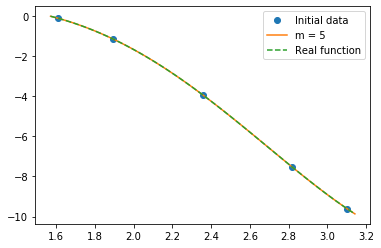

In [12]:
for m in range(1, 6):
    x = np.array([np.pi * 3 / 4 + np.pi / 4 * np.cos((2*i - 1) * np.pi / 2 / m) for i in range(1, m + 1)])
    y = f(x)
    plt.plot(x, y, 'o', label='Initial data')
    plt.plot(xlin, [lagranz(x, y, i) for i in xlin], '-', label='m = %i' % m)
    plt.plot(xlin, f(xlin), '--', label='Real function')
    plt.legend()
    plt.show()